In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess

In [73]:
def get_data(x, v, w, dt, time):
    par = open('config.txt', 'w')
    print(x, file=par)
    print(v, file=par)
    print(w, file=par)
    print(dt, file=par)
    print(time, file=par)
    par.close()
    returned_output = subprocess.check_output('./wk7')
    print(returned_output.decode('utf-8'))
    return pd.DataFrame(np.fromfile('data.binary', dtype=np.dtype([
                ('x', np.float64),
                ('v', np.float64),
                ('w', np.float64)
            ])))


data was written to data.binary



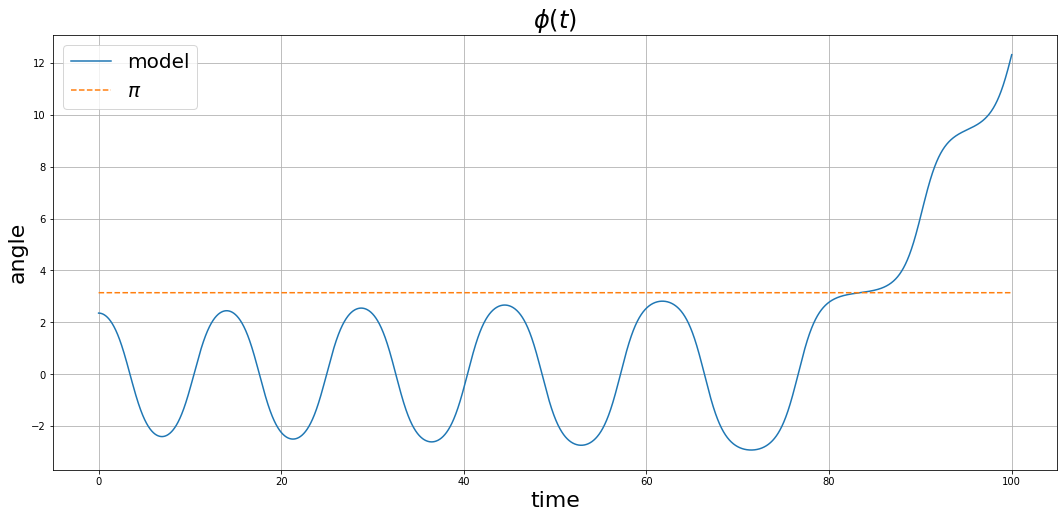

In [88]:
data = get_data(3 * np.pi/4, 0, 1, 0.01, 70)
fig, ax = plt.subplots()
fig.set_size_inches(18,8)

t = np.linspace(0, 100, len(data.x))
ax.plot(t, data.x, label='model')
ax.plot(t, np.pi+t-t,'--', label='$\pi$')
#ax.plot(t, 3 * np.pi / 4 * np.cos(t), '--')
ax.grid(True)
ax.legend(loc='best', fontsize=20)
ax.set_xlabel('time', fontsize=22)
ax.set_ylabel('angle', fontsize=22)
ax.set_title('$\phi(t)$', fontsize=24)
plt.show()